# Understanding the Objective
### The goal is to predict whether the salary for data-related positions, based on location, company reviews, and job title, is satisfactory or not.

### Importing the data set

In [2]:
# from google.colab import files # If someone wants to use google colaboratory

In [1]:

# uploaded = files.upload() # If someone wants to use google colaboratory

### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

### Reading the data

In [4]:
df_raw = pd.read_csv('df.csv')

### Data Understanding

In [5]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


Key observations emerge from the data:

1. Job titles can be grouped based on common keywords such as "Director," "Data Analyst," and similar terms.
2. The minimum and maximum salaries listed in the salary estimate column can be extracted and averaged to create a new "Average Salary" column, which will serve as our response variable.
3. Company names are unlikely to significantly impact the analysis and can be disregarded.
4. The state for each position can be identified and extracted from the location column.
5. Due to the large number of unknown values in the Revenue column, we will exclude it from the analysis.

### assessing the data

In this section, we will examine the raw data to gain a clearer understanding of its structure and the type of information it contains.

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


### Data Cleaning


- Created columns for the minimum and maximum salaries for each position by parsing the relevant values from the raw data.
- Added an average salary column calculated from the minimum and maximum salaries.
- Extracted the state for each position and created a corresponding "State" column.
- Created a "Title" column to categorize the posted roles into groups such as Data Engineer, Deep Learning, Analyst, etc.

In [20]:
  # Remove instances without acceptable salary estimates
  df = df_raw[df_raw['Salary Estimate'] != '-1']

In [21]:
 # Remove Per Hour salary
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [22]:
  # Remove $
  df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$', ' '))

In [23]:
  # Remove K
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))

In [24]:
#Split it
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

In [25]:
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

In [26]:
  # Cast Min_salary and Max_salary to int and get the avrage salary
df['Min_salary'] = df['Min_salary'].apply(lambda x:int(x))
df['Max_salary']=df['Max_salary'].astype(int)
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [27]:
# State: what state is the job in

df['State'] = df['Location'].apply(lambda x: x.split()[-1])

 # Remove instances with Kingdom as the state
df = df[df.State != 'Kingdom']

In [28]:
def title_organizer(x):
        """
        This function organizes the job title
        """
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'analyst' in x:
            return 'analyst'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'other'

In [29]:
 # Categorize Job Titles
df['Job Title'] = df['Job Title'].apply(title_organizer)

In [30]:
 # Remove unacceptable Ratings
df = df[df['Rating']!=-1]

In [31]:
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [32]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


### Exploratory Data Analysis (EDA)

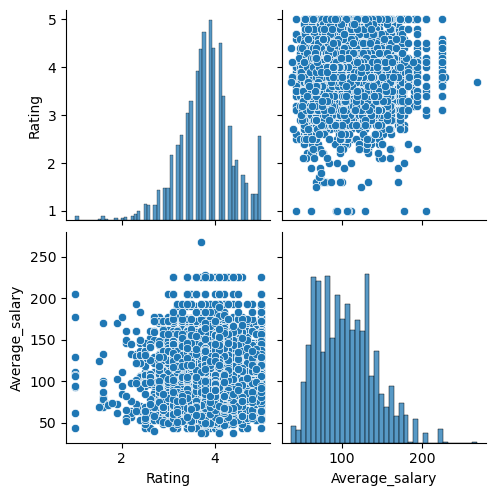

In [33]:
sns.pairplot(cleaned_df)

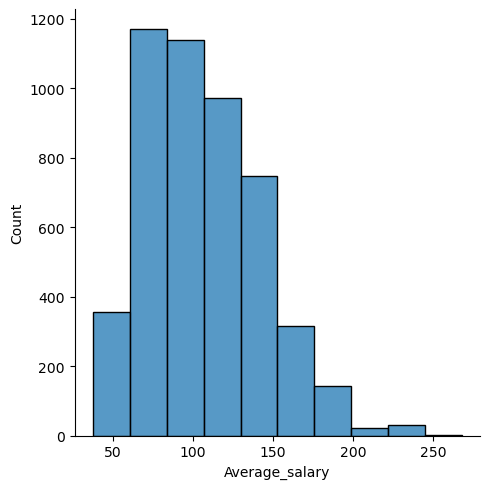

In [34]:
sns.displot(x='Average_salary', data= cleaned_df, bins = 10)

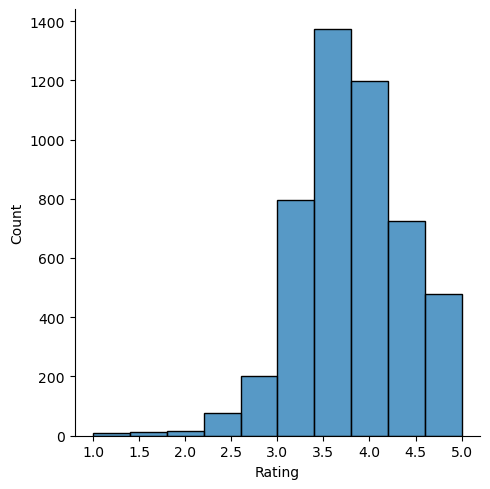

In [35]:
sns.displot(x='Rating', data= cleaned_df, bins = 10)

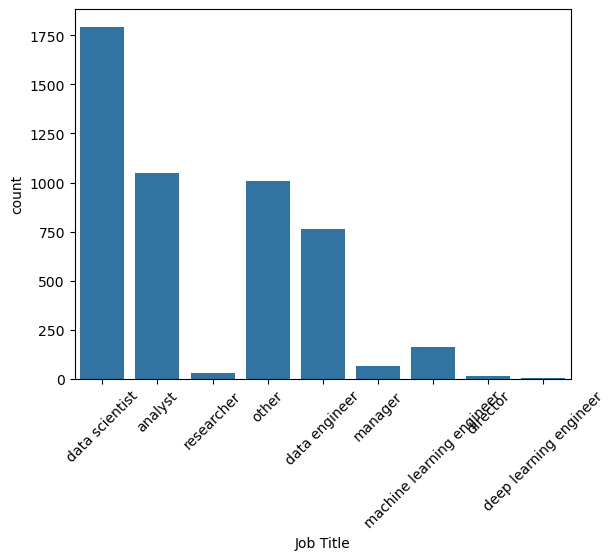

In [36]:
sns.countplot(x='Job Title', data= cleaned_df)
plt.xticks(rotation= 45)
plt.show()

<Axes: xlabel='Rating', ylabel='Average_salary'>

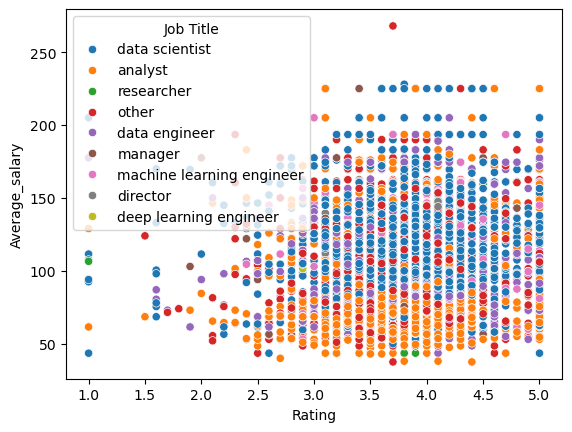

In [37]:
sns.scatterplot(x='Rating', y='Average_salary', data= cleaned_df, hue='Job Title')

### Feature Engineering

In [40]:
preprocessed_df = pd.get_dummies(cleaned_df, columns=['Job Title','State'] , dtype = int)

In [41]:
preprocessed_df

,Rating,Average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5882,4.2,68.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5883,4.0,89.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5886,4.0,89.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
# Choosing median value to categorized the salary
preprocessed_df['Average_salary'].median()

102.0

In [47]:
def sat(x):
  if x>= 102:
    return(1)
  else:
    return(0)

In [48]:
preprocessed_df['Satisfaction'] = preprocessed_df['Average_salary'].apply(sat)

In [49]:
preprocessed_df['Satisfaction']

0       1
1       1
3       1
4       1
5       1
       ..
5881    0
5882    0
5883    0
5886    0
5887    0
Name: Satisfaction, Length: 4891, dtype: int64

In [50]:
preprocessed_df[['Average_salary', 'Satisfaction']]

,Average_salary,Satisfaction
0,146.0,1
1,146.0,1
3,146.0,1
4,146.0,1
5,146.0,1
...,...,...
5881,51.0,0
5882,68.0,0
5883,89.5,0
5886,89.0,0


In [51]:
  X = preprocessed_df.drop(columns=['Average_salary', 'Satisfaction'])

In [52]:
y = preprocessed_df['Satisfaction']

### Modeling

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [54]:
from sklearn.linear_model import LogisticRegression

### Lgistic Regression

In [55]:
logreg = LogisticRegression()

In [56]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [57]:
prediction = logreg.predict(X_test)

In [58]:
prediction

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: Satisfaction, Length: 1468, dtype: int64

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test,prediction)

array([[517, 205],
       [230, 516]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       722
           1       0.72      0.69      0.70       746

    accuracy                           0.70      1468
   macro avg       0.70      0.70      0.70      1468
weighted avg       0.70      0.70      0.70      1468



### K Nearest Neighbors

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test, prediction)

0.7036784741144414

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
prediction_knn = knn.predict(X_test)

In [70]:
prediction_knn

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [71]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: Satisfaction, Length: 1468, dtype: int64

In [72]:
confusion_matrix(y_test, prediction_knn)

array([[472, 250],
       [253, 493]], dtype=int64)

In [73]:
accuracy_score(y_test, prediction_knn)

0.6573569482288828

In [74]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       722
           1       0.66      0.66      0.66       746

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468



### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier


In [76]:
tree = DecisionTreeClassifier()

In [77]:
tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [78]:
predict_tree = tree.predict(X_test)

In [79]:
predict_tree

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [80]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: Satisfaction, Length: 1468, dtype: int64

In [81]:
confusion_matrix(y_test,predict_tree)

array([[506, 216],
       [283, 463]], dtype=int64)

In [82]:
accuracy_score(y_test,predict_tree)

0.6600817438692098

In [83]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       722
           1       0.68      0.62      0.65       746

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468



### Random Forest classification algorithm


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
predict_rf = rf.predict(X_test)

In [88]:
predict_rf

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [89]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: Satisfaction, Length: 1468, dtype: int64

In [90]:
confusion_matrix(y_test, predict_rf)

array([[463, 259],
       [240, 506]], dtype=int64)

In [91]:
accuracy_score(y_test, predict_rf)

0.6600817438692098

In [ ]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       722
           1       0.68      0.68      0.68       746

    accuracy                           0.67      1468
   macro avg       0.67      0.67      0.67      1468
weighted avg       0.67      0.67      0.67      1468

